In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import CleanData as CD

In [3]:
data_dir = "data\\filter_tests\\"

## LASER ON

In [23]:
filterless = data_dir + "3_4\\curr_filter\\filterless"
one_new_filter = data_dir + "3_4\\curr_filter\\new_fiter_front_only"
curr_filter = data_dir + "3_4\\with_curr_filter"
both_new_filter = data_dir + "3_6\\new_filter_bothpoints"

In [28]:
filterless_df, filterless_settings = CD.clean_csv(filterless)
curr_filter_df, curr_filter_settings = CD.clean_csv(curr_filter)
both_new_df, both_new_settings = CD.clean_csv(both_new_filter)

In [29]:
filterless_ch1 = filterless_df['Ch 1']
curr_filter_ch1 = curr_filter_df['Ch 1']
both_new_ch1 = both_new_df['Ch 1']

In [30]:
filterless_df.head()

,Entry number,Time,Ch 1,Ch 2,Ch 3,Ch 4,Ch 5
0,0.00125,11:22:13 AM,60,10,0,0,0
1,0.00250,11:22:13 AM,64,11,0,0,0
2,0.00375,11:22:13 AM,67,5,0,0,0
3,0.00500,11:22:13 AM,66,9,0,0,0
4,0.00625,11:22:13 AM,59,16,0,0,0


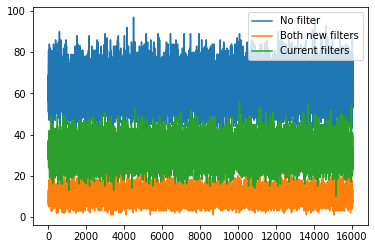

In [41]:
plt.plot(filterless_df['Ch 1'][0:-1], label = "No filter")
plt.plot(both_new_df['Ch 1'][0:len(filterless_df['Ch 1'])], label = "Both new filters")
plt.plot(curr_filter_df['Ch 1'][0:len(filterless_df['Ch 1'])], label = "Current filters")
plt.legend()
plt.show()


In [45]:
CC_naked = sum(filterless_df['Ch 4'][:len(filterless_df['Ch 1'])])
CC_new_filter = sum(both_new_df['Ch 4'][:len(filterless_df['Ch 1'])])
CC_curr_filter = sum(curr_filter_df['Ch 4'][:len(filterless_df['Ch 1'])])

<BarContainer object of 3 artists>

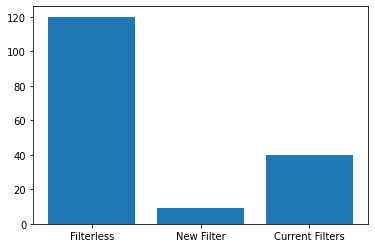

In [48]:
CC_data = {"Filterless": CC_naked, "New Filter": CC_new_filter, "Current Filters": CC_curr_filter}
labels = list(CC_data.keys())
coincidences = list(CC_data.values())
plt.bar(labels, coincidences)

In [73]:
print(CC_new_filter / CC_curr_filter)

0.225


## TORCH TESTS

In [60]:
torch_no_filter = data_dir + "torch_test\\naked"
torch_old_filter = data_dir + "torch_test\\old_filters_both"
torch_new_filter = data_dir + "torch_test\\new_filters_both"

In [61]:
t_no_filt, _ = CD.clean_csv(torch_no_filter)
t_old_filt, _ = CD.clean_csv(torch_old_filter)
t_new_filt, _ = CD.clean_csv(torch_new_filter)

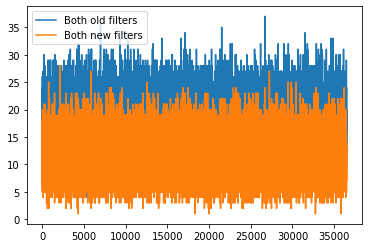

In [67]:
# plt.plot(t_no_filt['Ch 1'][:len(t_old_filt['Ch 1'])], label = "No filter")
plt.plot(t_old_filt['Ch 1'][:len(t_old_filt['Ch 1'])], label = "Both old filters")
plt.plot(t_new_filt['Ch 1'][:len(t_old_filt['Ch 1'])], label = "Both new filters")
plt.legend()
plt.show()


In [68]:
t_CC_naked = sum(t_no_filt['Ch 4'][:len(t_old_filt['Ch 1'])])
t_CC_new_filter = sum(t_new_filt['Ch 4'][:len(t_old_filt['Ch 1'])])
t_CC_curr_filter = sum(t_old_filt['Ch 4'][:len(t_old_filt['Ch 1'])])

<BarContainer object of 2 artists>

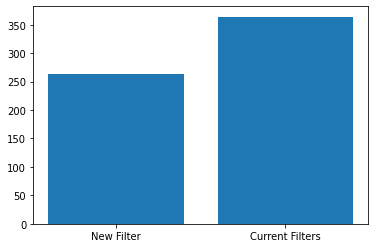

In [72]:
t_CC_data = {"New Filter": t_CC_new_filter, "Current Filters": t_CC_curr_filter}
t_labels = list(t_CC_data.keys())
t_coincidences = list(t_CC_data.values())
plt.bar(t_labels, t_coincidences)

In [74]:
print(t_CC_new_filter / t_CC_curr_filter)

0.7225274725274725
